# Number of parameters and average cross-talk for Inferred Models

In [1]:
from quasinet.utils import numparameters
from quasinet.qnet import load_qnet
import glob
from tqdm import tqdm

In [2]:
FILES=glob.glob('./irat_enet/irat/*/*gz')
complexity=[numparameters(load_qnet(file,gz=True)) for file in tqdm(FILES)]

100%|█████████████████████████████████████████| 128/128 [00:12<00:00, 10.25it/s]


In [3]:
FILESv=glob.glob('./irat_enet/variant/*/*/*gz')
complexityv=[numparameters(load_qnet(file,gz=True)) for file in tqdm(FILESv)]

100%|█████████████████████████████████████████| 333/333 [00:33<00:00, 10.08it/s]


In [4]:
FILESs=glob.glob('./enet_predictions/*/*gz')
complexitys=[numparameters(load_qnet(file,gz=True)) for file in tqdm(FILESs)]

100%|███████████████████████████████████████████| 84/84 [00:04<00:00, 19.41it/s]


In [5]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

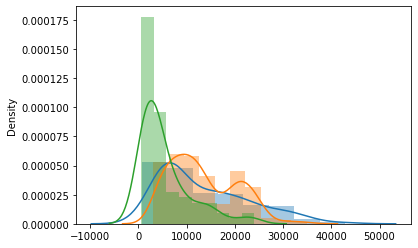

In [6]:
sns.distplot([x[0] for x in complexity])
sns.distplot([x[0] for x in complexityv])
sns.distplot([x[0] for x in complexitys])

<AxesSubplot:ylabel='Density'>

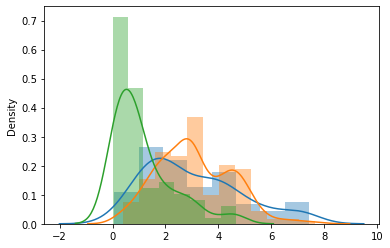

In [7]:
sns.distplot([x[1] for x in complexity])
sns.distplot([x[1] for x in complexityv])
sns.distplot([x[1] for x in complexitys])


In [14]:
import pandas as pd
import numpy as np
pd.DataFrame({'irat':np.mean([x[0] for x in complexity]),
              'variant':np.mean([x[0] for x in complexityv]),
              'seasonal':np.mean([x[0] for x in complexitys])},index=['parameters'])

,irat,variant,seasonal
parameters,13507.9375,13335.39039,5417.833333


In [15]:
pd.DataFrame({'irat':np.mean([x[1] for x in complexity]),
              'variant':np.mean([x[1] for x in complexityv]),
              'seasonal':np.mean([x[1] for x in complexitys])},index=['parameters'])

,irat,variant,seasonal
parameters,3.022385,3.081067,1.129098
